This is a demo of how we can add catalog simulations to LSST alerts in avro forma, which the Rubin project is using. 

Follow the README of this repository and then the README of `alert_packet` for setup. This involves installing `alert_packet` in some way.

This notebook is based on the examples and codes in `alert_packet` :https://github.com/lsst/alert_packet

In [1]:
import lsst.alert.packet

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
import json
import pandas as pd
from astropy.io import fits
import numpy as np

In [4]:
schema = lsst.alert.packet.Schema.from_file()

If you clone the repository `alert_packet` this is the location of the alert.json file.

In [5]:
path = Path('../../alert_packet/python/lsst/alert/packet/schema/4/0/sample_data/')
with open(path/'alert.json') as f:
    alert_data = json.load(f)

In [6]:
alert_data['diaSource']

{'diaSourceId': 281323062375219200,
 'ccdVisitId': 111111,
 'midPointTai': 1480360995,
 'filterName': 'r',
 'programId': 1,
 'ra': 351.570546978,
 'decl': 0.126243049656,
 'raSigma': 0.00028,
 'declSigma': 0.00028,
 'ra_decl_Cov': 0.00029,
 'x': 112.1,
 'y': 121.1,
 'xSigma': 1.2,
 'ySigma': 1.1,
 'x_y_Cov': 1.2,
 'apFlux': 1241.0,
 'apFluxErr': 12.0,
 'snr': 41.1,
 'psFlux': 1241.0,
 'psFluxErr': 12.0,
 'flags': 0}

In [7]:
alert_data['prvDiaSources']

[{'diaSourceId': 281323062375219198,
  'ccdVisitId': 111111,
  'midPointTai': 1480360995,
  'filterName': 'r',
  'programId': 1,
  'ra': 351.570546978,
  'decl': 0.126243049656,
  'raSigma': 0.00028,
  'declSigma': 0.00028,
  'ra_decl_Cov': 0.00029,
  'x': 112.1,
  'y': 121.1,
  'xSigma': 1.2,
  'ySigma': 1.1,
  'x_y_Cov': 1.2,
  'apFlux': 1241.0,
  'apFluxErr': 12.0,
  'snr': 41.1,
  'psFlux': 1241.0,
  'psFluxErr': 12.0,
  'flags': 0},
 {'diaSourceId': 281323062375219199,
  'ccdVisitId': 111111,
  'midPointTai': 1480360995,
  'filterName': 'r',
  'programId': 1,
  'ra': 351.570546978,
  'decl': 0.126243049656,
  'raSigma': 0.00028,
  'declSigma': 0.00028,
  'ra_decl_Cov': 0.00029,
  'x': 112.1,
  'y': 121.1,
  'xSigma': 1.2,
  'ySigma': 1.1,
  'x_y_Cov': 1.2,
  'apFlux': 1241.0,
  'apFluxErr': 12.0,
  'snr': 41.1,
  'psFlux': 1241.0,
  'psFluxErr': 12.0,
  'flags': 0}]

In [8]:
alert_data['prvDiaSources']

[{'diaSourceId': 281323062375219198,
  'ccdVisitId': 111111,
  'midPointTai': 1480360995,
  'filterName': 'r',
  'programId': 1,
  'ra': 351.570546978,
  'decl': 0.126243049656,
  'raSigma': 0.00028,
  'declSigma': 0.00028,
  'ra_decl_Cov': 0.00029,
  'x': 112.1,
  'y': 121.1,
  'xSigma': 1.2,
  'ySigma': 1.1,
  'x_y_Cov': 1.2,
  'apFlux': 1241.0,
  'apFluxErr': 12.0,
  'snr': 41.1,
  'psFlux': 1241.0,
  'psFluxErr': 12.0,
  'flags': 0},
 {'diaSourceId': 281323062375219199,
  'ccdVisitId': 111111,
  'midPointTai': 1480360995,
  'filterName': 'r',
  'programId': 1,
  'ra': 351.570546978,
  'decl': 0.126243049656,
  'raSigma': 0.00028,
  'declSigma': 0.00028,
  'ra_decl_Cov': 0.00029,
  'x': 112.1,
  'y': 121.1,
  'xSigma': 1.2,
  'ySigma': 1.1,
  'x_y_Cov': 1.2,
  'apFlux': 1241.0,
  'apFluxErr': 12.0,
  'snr': 41.1,
  'psFlux': 1241.0,
  'psFluxErr': 12.0,
  'flags': 0}]

## What does the data corresponding to a diasrc look like? 

This is just a dictionary: You can write some code to read the data from SNANA and write it to the values of the correct keys

In [9]:
diasrc = alert_data['prvDiaSources'][0]

In [10]:
from copy import copy

Example:

In [11]:
my_diasrc = copy(diasrc)

In [12]:
my_diasrc['psFlux'] = 1531.2
my_diasrc['snr'] = my_diasrc['psFlux']/my_diasrc['psFluxErr']# Not sure this is correct !

In [13]:
print(diasrc)

{'diaSourceId': 281323062375219198, 'ccdVisitId': 111111, 'midPointTai': 1480360995, 'filterName': 'r', 'programId': 1, 'ra': 351.570546978, 'decl': 0.126243049656, 'raSigma': 0.00028, 'declSigma': 0.00028, 'ra_decl_Cov': 0.00029, 'x': 112.1, 'y': 121.1, 'xSigma': 1.2, 'ySigma': 1.1, 'x_y_Cov': 1.2, 'apFlux': 1241.0, 'apFluxErr': 12.0, 'snr': 41.1, 'psFlux': 1241.0, 'psFluxErr': 12.0, 'flags': 0}


In [14]:
print(my_diasrc)

{'diaSourceId': 281323062375219198, 'ccdVisitId': 111111, 'midPointTai': 1480360995, 'filterName': 'r', 'programId': 1, 'ra': 351.570546978, 'decl': 0.126243049656, 'raSigma': 0.00028, 'declSigma': 0.00028, 'ra_decl_Cov': 0.00029, 'x': 112.1, 'y': 121.1, 'xSigma': 1.2, 'ySigma': 1.1, 'x_y_Cov': 1.2, 'apFlux': 1241.0, 'apFluxErr': 12.0, 'snr': 127.60000000000001, 'psFlux': 1531.2, 'psFluxErr': 12.0, 'flags': 0}


## Converting to efficient avro format

Now with the entire `alert_data` file, we have

In [16]:
avro_bytes = schema.serialize(alert_data)

In [17]:
messg = schema.deserialize(avro_bytes)

In [15]:
simdir='../../../cameron/'
name_head=simdir+'PALEO_YSE_NONIaMODEL0-0001_HEAD.FITS.gz'

name_phot=simdir+'PALEO_YSE_NONIaMODEL0-0001_PHOT.FITS.gz'

In [16]:
head = fits.open(name_head)
#print(head[1].data)
phot = fits.open(name_phot)
#print(phot[1].data)
phot_cols=phot[1].columns
print(phot_cols)

mjd = phot[1].data['MJD']
bound = np.where(mjd==-777)[0][0]
filt = phot[1].data['FLT'][0:bound]
mag = phot[1].data['SIM_MAGOBS'][0:bound]
ginds = np.where(phot[1].data['FLT'][0:bound]=='g')
zinds = np.where(phot[1].data['FLT'][0:bound]=='z')
fluxcal =  phot[1].data['FLUXCAL'][0:bound]
fluxcalerr =  phot[1].data['FLUXCALERR'][0:bound]
snr = fluxcal/fluxcalerr
mjd=mjd[0:bound]

ColDefs(
    name = 'MJD'; format = '1D'
    name = 'FLT'; format = '2A'
    name = 'FIELD'; format = '12A'
    name = 'PHOTFLAG'; format = '1J'
    name = 'PHOTPROB'; format = '1E'
    name = 'FLUXCAL'; format = '1E'
    name = 'FLUXCALERR'; format = '1E'
    name = 'PSF_SIG1'; format = '1E'
    name = 'SKY_SIG'; format = '1E'
    name = 'ZEROPT'; format = '1E'
    name = 'SIM_MAGOBS'; format = '1E'
)


(array([  0,   4,   6,   7,   9,  14,  15,  27,  29,  31,  32,  37,  38,
        41,  45,  46,  56,  57,  60,  62,  66,  67,  74,  75,  76,  77,
        78,  79,  82,  86,  88,  99, 100, 101, 102, 119]),)


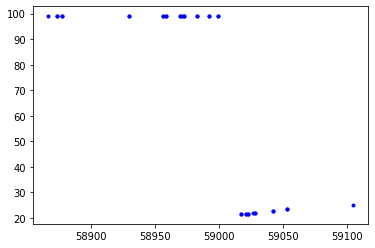

In [17]:
plt.plot(mjd[ginds], mag[ginds], '.', color='b')
print(ginds)
path = Path('../../alert_packet/python/lsst/alert/packet/schema/4/0/sample_data/')
with open(path/'alert.json') as f:
    alert_data_orig = json.load(f)
alert = copy(alert_data_orig)

In [18]:
diasrc = alert_data_orig['prvDiaSources'][0]
my_diasrc = copy(diasrc)
alert = copy(alert_data_orig)
print(alert['prvDiaSources'])
alert['prvDiaSources'].clear()
print(alert['prvDiaSources'])

ginds[0][1:3]

[{'diaSourceId': 281323062375219198, 'ccdVisitId': 111111, 'midPointTai': 1480360995, 'filterName': 'r', 'programId': 1, 'ra': 351.570546978, 'decl': 0.126243049656, 'raSigma': 0.00028, 'declSigma': 0.00028, 'ra_decl_Cov': 0.00029, 'x': 112.1, 'y': 121.1, 'xSigma': 1.2, 'ySigma': 1.1, 'x_y_Cov': 1.2, 'apFlux': 1241.0, 'apFluxErr': 12.0, 'snr': 41.1, 'psFlux': 1241.0, 'psFluxErr': 12.0, 'flags': 0}, {'diaSourceId': 281323062375219199, 'ccdVisitId': 111111, 'midPointTai': 1480360995, 'filterName': 'r', 'programId': 1, 'ra': 351.570546978, 'decl': 0.126243049656, 'raSigma': 0.00028, 'declSigma': 0.00028, 'ra_decl_Cov': 0.00029, 'x': 112.1, 'y': 121.1, 'xSigma': 1.2, 'ySigma': 1.1, 'x_y_Cov': 1.2, 'apFlux': 1241.0, 'apFluxErr': 12.0, 'snr': 41.1, 'psFlux': 1241.0, 'psFluxErr': 12.0, 'flags': 0}]
[]


array([4, 6])

In [19]:
my_diasrc['diaSourceId'] = 281323062375219198
my_diasrc['midPointTai'] = mjd[0]
my_diasrc['filterName'] = filt[0]
my_diasrc['snr'] = snr[0]
my_diasrc['apFlux'] = fluxcal[0]
my_diasrc['apFluxErr'] = fluxcalerr[0]
alert['diaSource'] = my_diasrc

print('-------')
for count, i in enumerate(ginds[0][1:5]):
    print(count,i)
    my_diasrc = copy(diasrc)
    my_diasrc['diaSourceId'] = my_diasrc['diaSourceId']+count+1
    my_diasrc['midPointTai'] = mjd[i]
    my_diasrc['filterName'] = filt[i]
    my_diasrc['snr'] = snr[i]
    my_diasrc['apFlux'] = fluxcal[i]
    my_diasrc['apFluxErr'] = fluxcalerr[i]
  
    alert['prvDiaSources'].append(alert['diaSource'])
    #print(alert['prvDiaSources'])
    #print('*******')
    alert['diaSource'] = my_diasrc
    #print(alert['diaSource'])
    
print('====')   
alert['prvDiaSources']

-------
0 4
1 6
2 7
3 9
====


[{'diaSourceId': 281323062375219198,
  'ccdVisitId': 111111,
  'midPointTai': 58866.65,
  'filterName': 'g',
  'programId': 1,
  'ra': 351.570546978,
  'decl': 0.126243049656,
  'raSigma': 0.00028,
  'declSigma': 0.00028,
  'ra_decl_Cov': 0.00029,
  'x': 112.1,
  'y': 121.1,
  'xSigma': 1.2,
  'ySigma': 1.1,
  'x_y_Cov': 1.2,
  'apFlux': 44.507946,
  'apFluxErr': 84.96024,
  'snr': 0.5238679,
  'psFlux': 1241.0,
  'psFluxErr': 12.0,
  'flags': 0},
 {'diaSourceId': 281323062375219199,
  'ccdVisitId': 111111,
  'midPointTai': 58873.62,
  'filterName': 'g',
  'programId': 1,
  'ra': 351.570546978,
  'decl': 0.126243049656,
  'raSigma': 0.00028,
  'declSigma': 0.00028,
  'ra_decl_Cov': 0.00029,
  'x': 112.1,
  'y': 121.1,
  'xSigma': 1.2,
  'ySigma': 1.1,
  'x_y_Cov': 1.2,
  'apFlux': 29.688177,
  'apFluxErr': 83.44725,
  'snr': 0.35577178,
  'psFlux': 1241.0,
  'psFluxErr': 12.0,
  'flags': 0},
 {'diaSourceId': 281323062375219200,
  'ccdVisitId': 111111,
  'midPointTai': 58873.62,
  'filt

In [20]:
alert['diaSource']

{'diaSourceId': 281323062375219202,
 'ccdVisitId': 111111,
 'midPointTai': 58877.64,
 'filterName': 'g',
 'programId': 1,
 'ra': 351.570546978,
 'decl': 0.126243049656,
 'raSigma': 0.00028,
 'declSigma': 0.00028,
 'ra_decl_Cov': 0.00029,
 'x': 112.1,
 'y': 121.1,
 'xSigma': 1.2,
 'ySigma': 1.1,
 'x_y_Cov': 1.2,
 'apFlux': -35.089245,
 'apFluxErr': 77.37789,
 'snr': -0.45347896,
 'psFlux': 1241.0,
 'psFluxErr': 12.0,
 'flags': 0}